# Import and default settings

In [53]:
#%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget

import datetime
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 300, "display.min_rows", 200, "display.max_columns", 100, "display.width", None)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams['figure.figsize'] = [18, 10]


import seaborn as sns
sns.set_theme()
sns.set(style="darkgrid")


# Indhentning af data

Henter resultatet af en nylig test.
Cirka 5500 aktier, ca 1000 børsdage.

Handelssignal inden videre segmentering:
* (Åbningskurs-Lukkekurs dagen før) er procentuelt > 8x gns. volatilitet for aktien
* Markedsværdien er under 500 millioner USD
* Prisen for aktien er minimum 1 USD

Antal handelssignaler: 1875
Ratio af handelssignaler til (børsdage X tickers): ~1:3000


In [19]:
df = pd.read_csv(r'C:\01 SR Data partition\Jottacloud\04 Programmering\04 Python Programmering\Resultsdataframe-Alle-Aktier-18.02.2022.csv')

In [43]:
df.head(15)

,Unnamed: 0,Date,Stock,GapSize,GapSizeRel,RVOL10D,$volume,Day1,Day2,Overnight,2Day,Day1Trade,Day2Trade,OvernightTrade,2DayTrade,Day1TradeCum,Day2TradeCum,OvernightTradeCum,2DayTradeCum,MaxChange,OpenPrice,market_cap,PreHigh,PreVolume
0,0,2018-01-04,CNET,142.735043,3564.612742,NaN,5.367655e+08,-2.288732,0.310762,0.114561,-1.007042,-0.229373,0.030576,0.010956,-0.101204,-0.229373,0.030576,0.010956,-0.101204,319.014085,2.84,3.300072e+08,NaN,NaN
1,1,2018-01-04,ZUMZ,17.560976,807.945434,NaN,1.938032e+06,0.047718,0.023810,-0.006536,0.064315,0.004272,0.001881,-0.001154,0.005932,-0.225101,0.032457,0.009803,-0.095273,1.431535,24.10,5.259910e+08,NaN,NaN
2,2,2018-01-08,MYSZ,50.602410,1317.242897,NaN,2.486107e+07,-0.144000,0.252174,0.195804,0.312000,-0.014900,0.024717,0.019080,0.030700,-0.240001,0.057175,0.028883,-0.064573,43.200000,37.50,6.858996e+07,NaN,NaN
3,3,2018-01-10,TNDM,26.923077,1027.823339,NaN,1.047976e+06,0.055096,0.028986,-0.005831,0.077135,0.005010,0.002399,-0.001083,0.007213,-0.234992,0.059573,0.027800,-0.057359,9.641873,3.63,2.179172e+08,NaN,NaN
4,4,2018-01-10,VOXX,25.225225,936.808176,NaN,4.063977e+05,0.064748,0.015504,0.007692,0.086331,0.005975,0.001050,0.000269,0.008133,-0.229017,0.060623,0.028069,-0.049226,0.719424,6.95,1.551913e+08,NaN,NaN
5,5,2018-01-11,RELL,18.326118,1119.711915,NaN,4.063875e+04,0.030488,-0.026415,0.000000,0.004878,0.002549,-0.003142,-0.000500,-0.000012,-0.226468,0.057482,0.027569,-0.049238,0.000000,8.20,1.060345e+08,NaN,NaN
6,6,2018-01-11,NBEV,31.898239,867.280138,NaN,1.922865e+06,0.059347,0.097179,-0.006309,0.145401,0.005435,0.009218,-0.001131,0.014040,-0.221033,0.066700,0.026438,-0.035198,7.715134,3.37,4.653964e+08,NaN,NaN
7,7,2018-01-12,PFMT,80.412371,2048.697693,NaN,1.092927e+07,0.340000,-0.047619,0.000000,0.308571,0.033500,-0.005262,-0.000500,0.030357,-0.187533,0.061438,0.025938,-0.004841,0.571429,3.50,1.597234e+08,NaN,NaN
8,8,2018-01-16,SPI,137.757833,2750.079091,7.712746,8.475423e+06,0.311258,0.074468,0.096154,0.423841,0.030626,0.006947,0.009115,0.041884,-0.156908,0.068385,0.035054,0.037043,5.298013,15.10,2.481759e+07,NaN,NaN
9,9,2018-01-16,RCON,50.733138,1249.610765,9.175977,2.120077e+07,-0.178988,0.160000,0.092409,0.101167,-0.018399,0.015500,0.008741,0.009617,-0.175306,0.083885,0.043794,0.046660,108.560311,12.85,8.180110e+07,NaN,NaN


## Grafer - uden segmentering

Alle grafer er interaktive - brug menuen til venstre for den enkelte graf


<AxesSubplot:xlabel='Share price at open', ylabel='Percentage return on trade'>

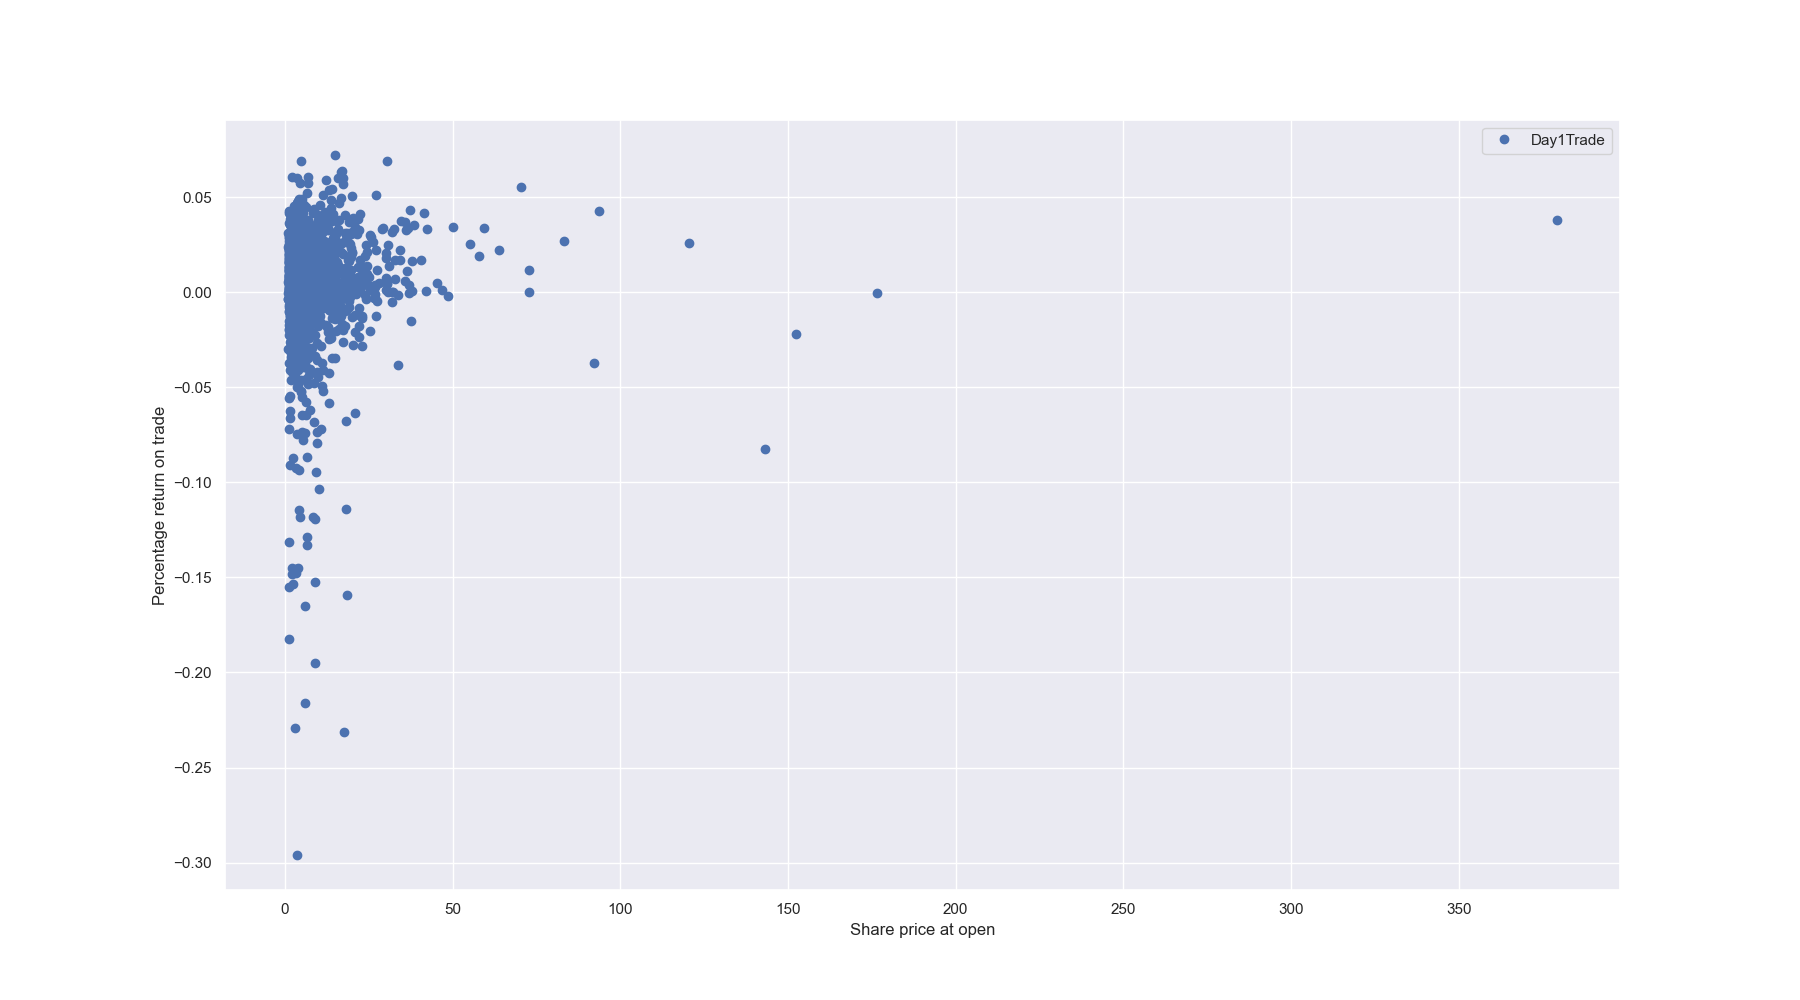

In [54]:
df.plot(x="OpenPrice",y="Day1Trade",style="o",xlabel="Share price at open",ylabel="Percentage return on trade")


<AxesSubplot:xlabel='Market Cap', ylabel='Percentage return on trade'>

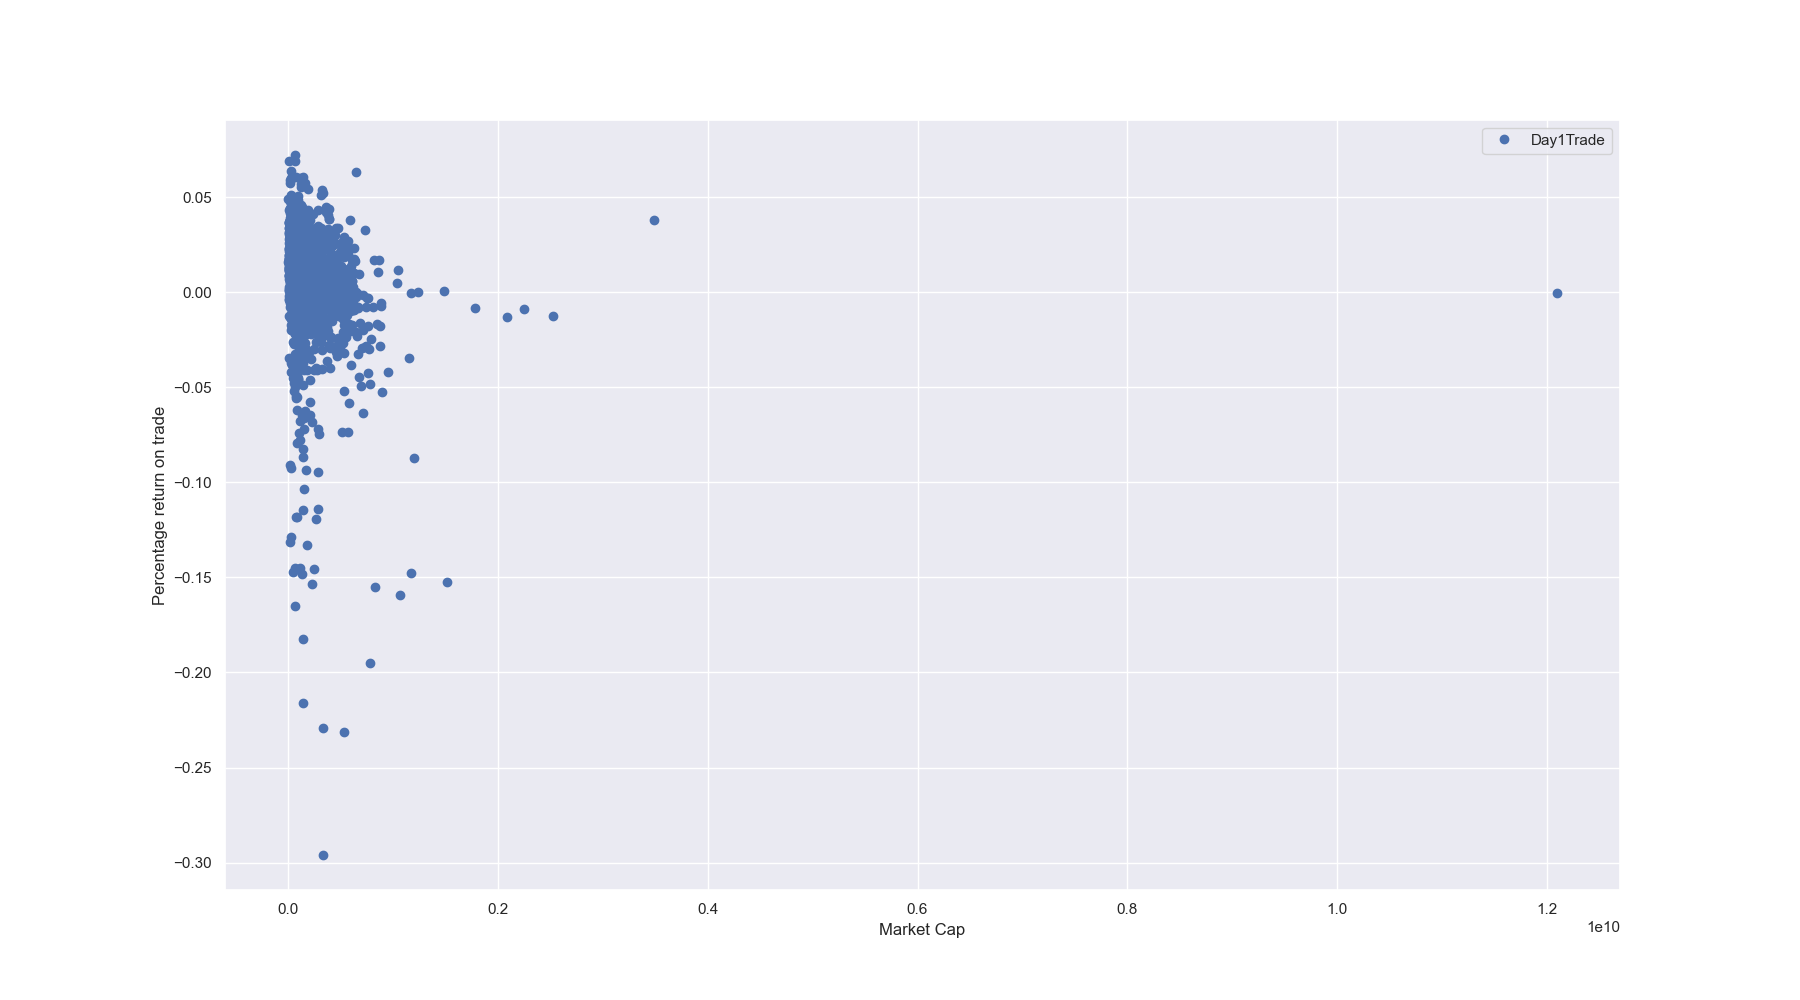

In [56]:
df.plot(x="market_cap", y="Day1Trade",style="o",xlabel="Market Cap",ylabel="Percentage return on trade")

<AxesSubplot:xlabel='Date', ylabel='Percentage return (in hundreds)'>

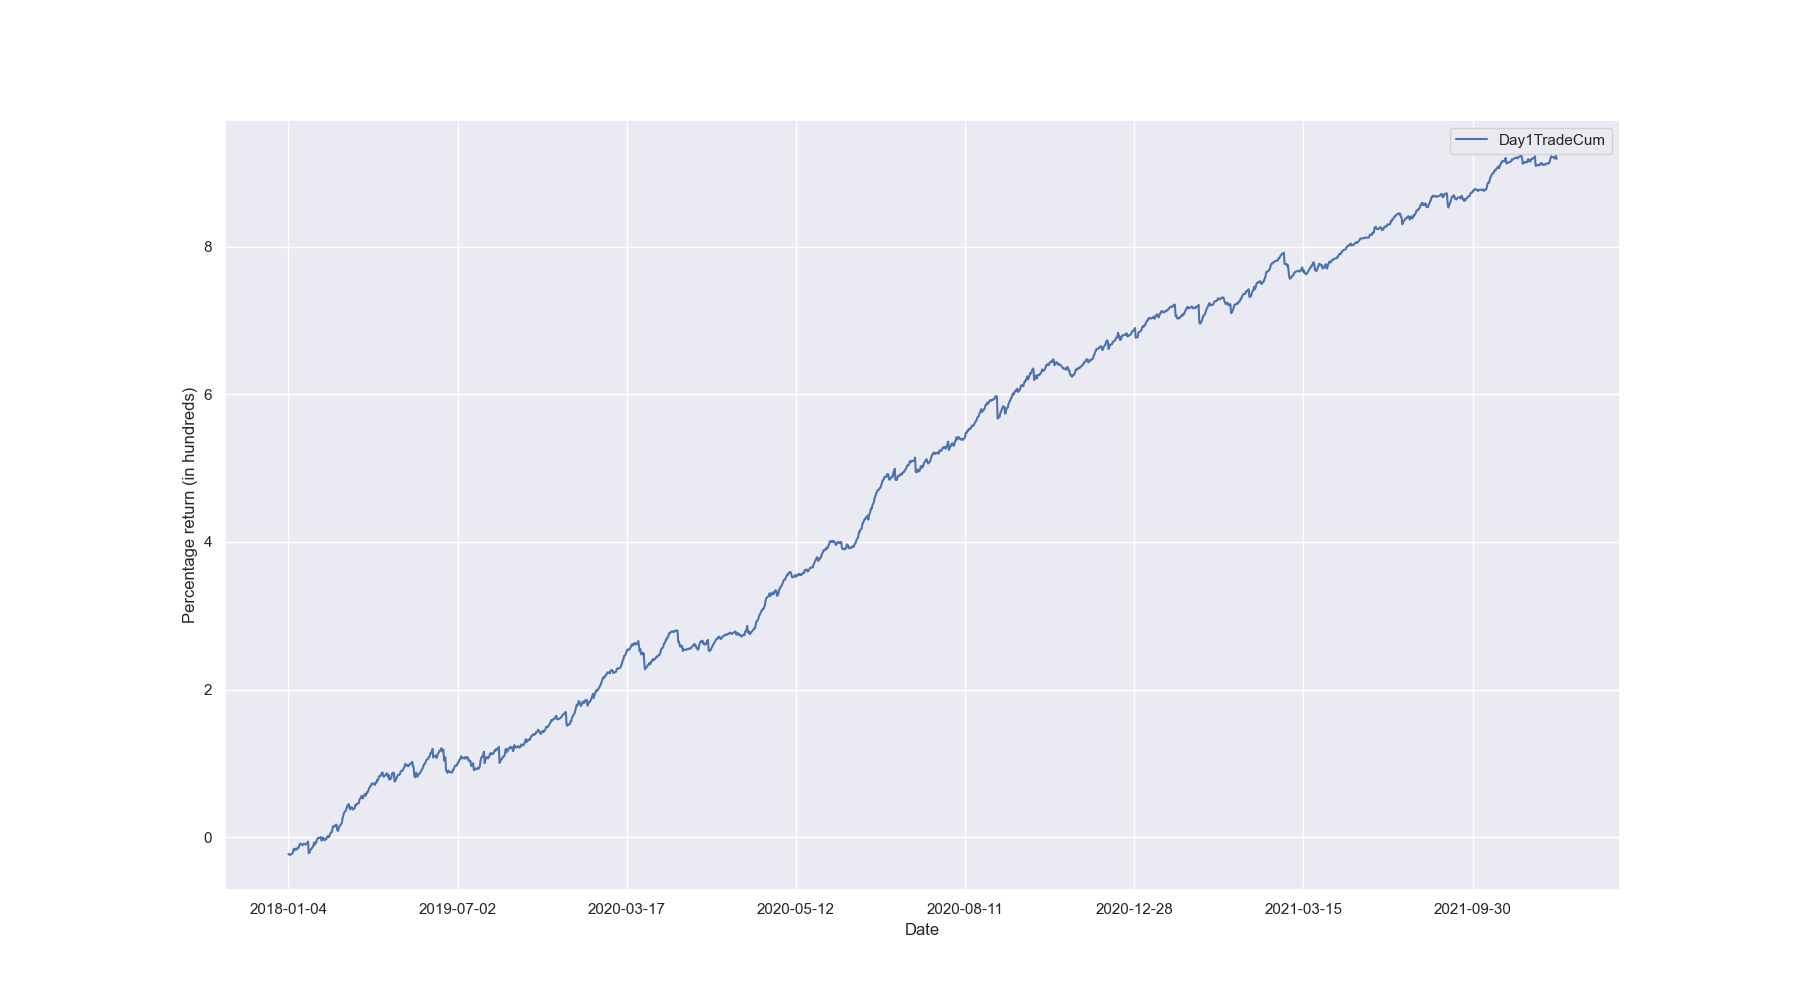

In [58]:
df.plot(x="Date",y="Day1TradeCum",ylabel = 'Percentage return (in hundreds)')

<AxesSubplot:xlabel='market_cap'>

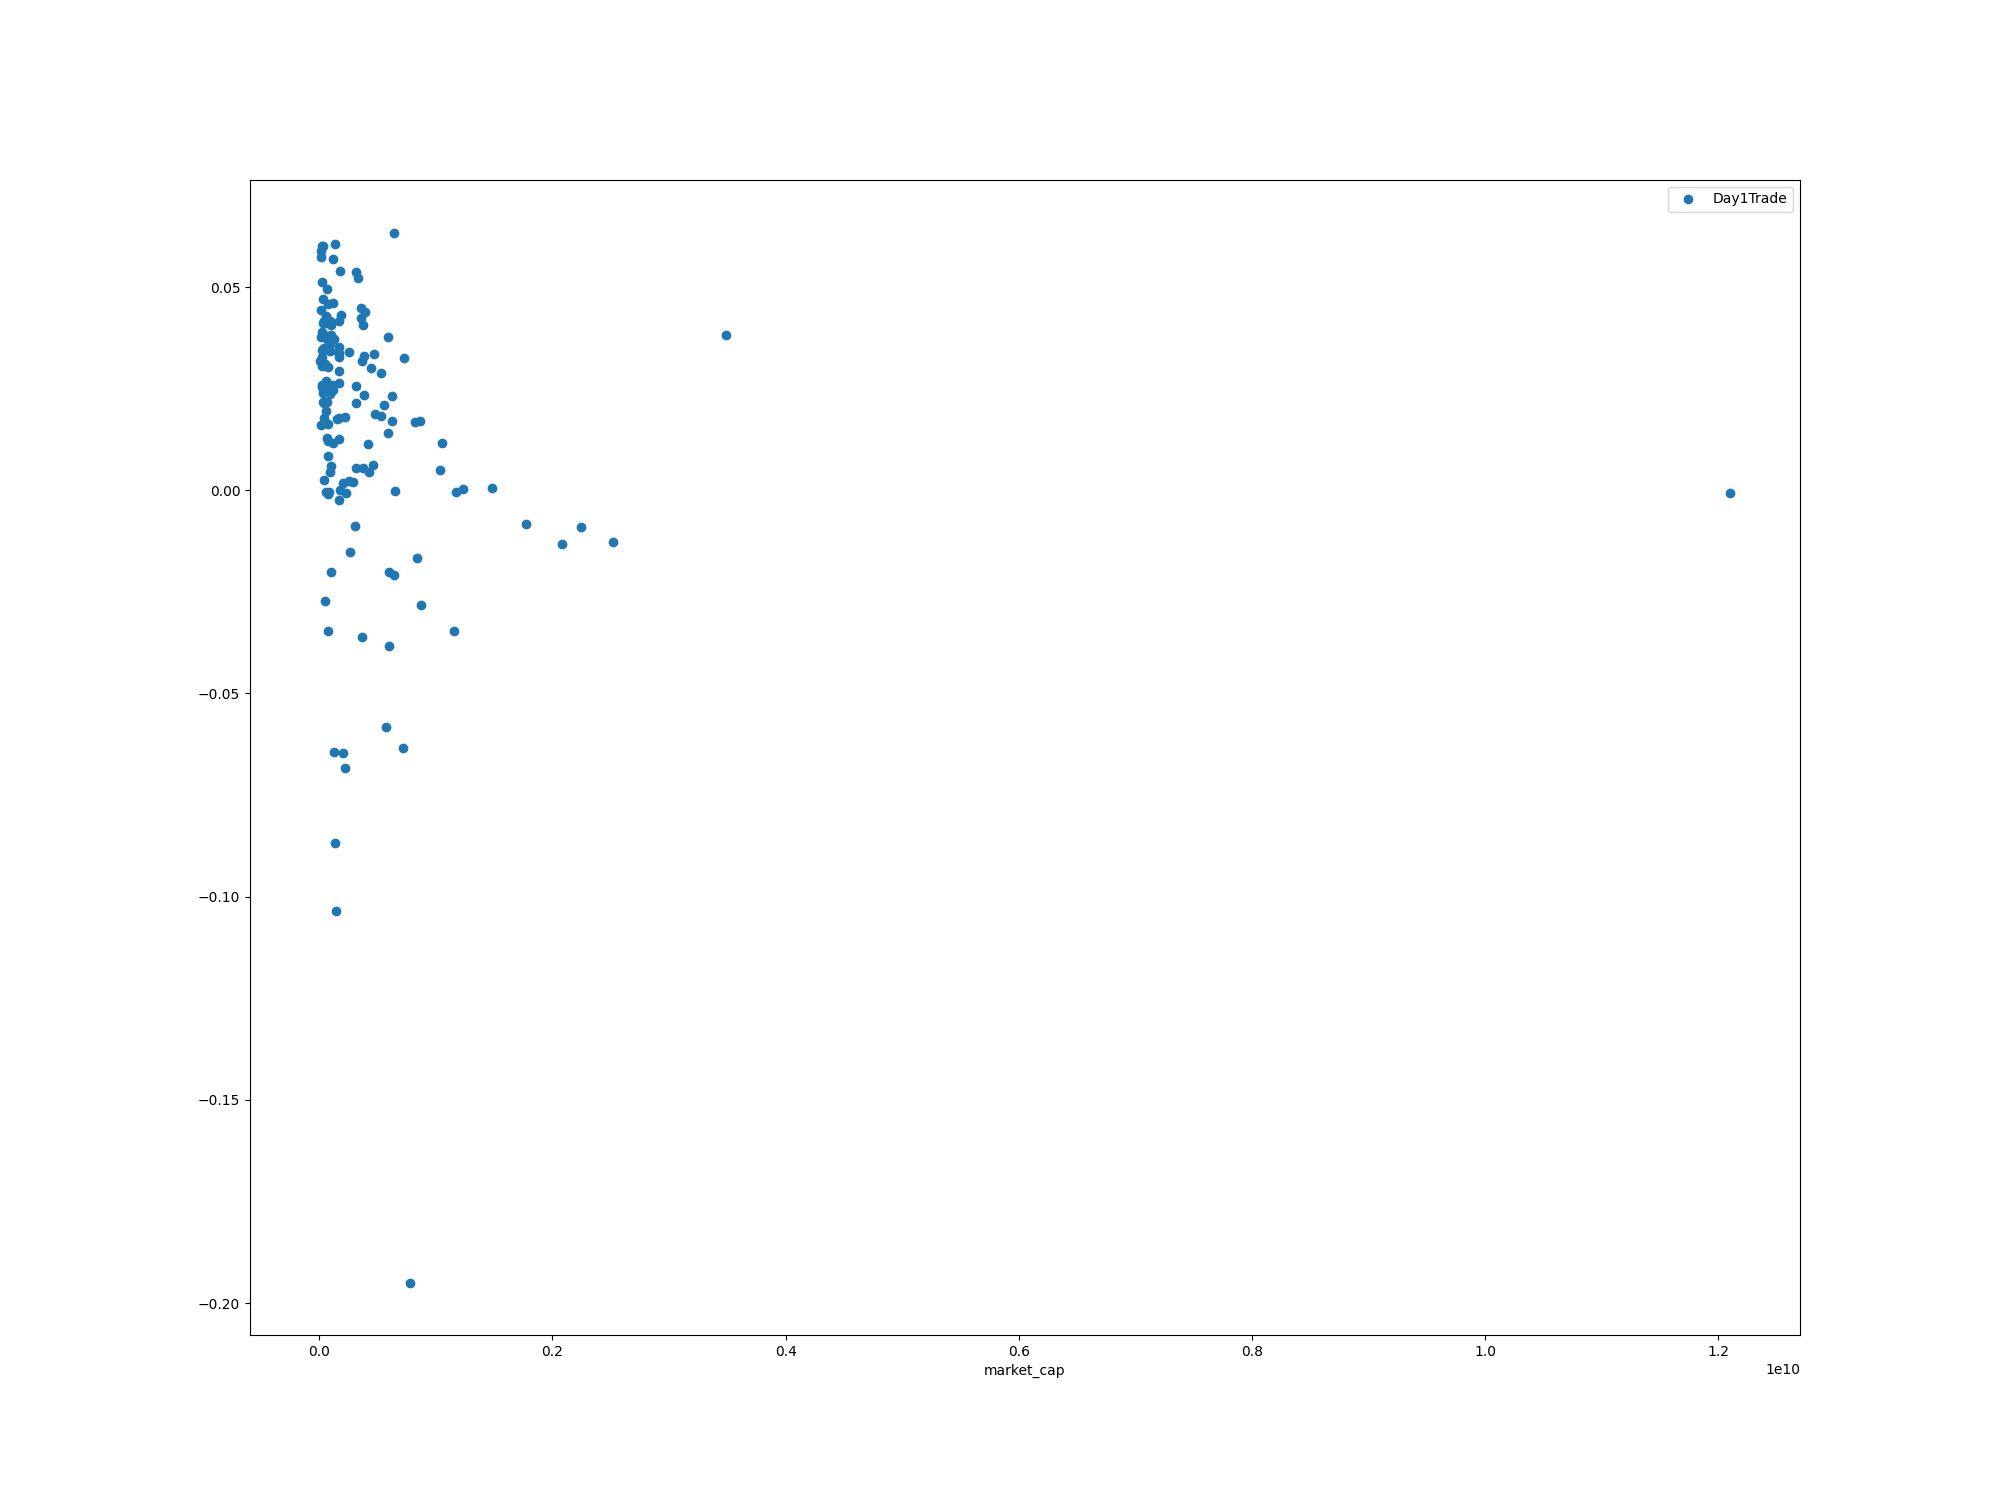

In [25]:
resultsdataframe_adj.plot(x="market_cap", y="Day1Trade",style="o")

## Grafer - med segmentering

In [63]:
df_adjusted = df[(df['OpenPrice'] > 5) & (df['GapSize'] > 100)]

df_adjusted.head(10)

,Unnamed: 0,Date,Stock,GapSize,GapSizeRel,RVOL10D,$volume,Day1,Day2,Overnight,2Day,Day1Trade,Day2Trade,OvernightTrade,2DayTrade,Day1TradeCum,Day2TradeCum,OvernightTradeCum,2DayTradeCum,MaxChange,OpenPrice,market_cap,PreHigh,PreVolume
8,8,2018-01-16,SPI,137.757833,2750.079091,7.712746,8.475423e+06,0.311258,0.074468,0.096154,0.423841,0.030626,0.006947,0.009115,0.041884,-0.156908,0.068385,0.035054,0.037043,5.298013,15.100,2.481759e+07,NaN,NaN
16,16,2018-01-25,LTBR,113.953488,2673.799662,3.172603,4.407219e+07,0.258696,0.022876,0.102639,0.350000,0.025370,0.001788,0.009764,0.034500,-0.117003,0.087789,0.063661,0.134480,4.347826,55.200,2.601333e+07,NaN,NaN
57,57,2018-06-12,GLMD,262.000000,7968.338486,9.381029,1.271291e+08,0.305841,-0.014116,-0.006822,0.291239,0.030084,-0.001912,-0.001182,0.028624,0.004742,0.154480,0.106941,0.431157,6.787687,25.340,4.412260e+08,NaN,NaN
59,59,2018-06-19,ASTC,246.666667,6497.600470,9.925215,1.714689e+07,0.059172,0.112299,0.117925,0.263314,0.005417,0.010730,0.011292,0.025831,0.017431,0.140430,0.120093,0.444572,20.562130,6.760,3.149120e+08,NaN,NaN
74,74,2018-07-16,CODA,112.058658,4002.662478,9.937932,1.866443e+07,0.222503,0.134892,0.095935,0.391909,0.021750,0.012989,0.009093,0.038691,0.107403,0.102230,0.149623,0.613076,6.700379,7.910,6.677175e+07,NaN,NaN
121,121,2018-10-29,SOLO,156.880734,3890.523556,9.934534,2.291845e+07,0.187500,0.192683,0.098901,0.408929,0.018250,0.018768,0.009390,0.040393,0.692483,0.259190,0.130084,1.348794,33.571429,5.600,5.325455e+08,NaN,NaN
131,131,2018-11-08,RSLS,16105.128205,295691.548464,0.520358,3.461221e+06,0.386076,-0.187166,0.036082,0.297468,0.038108,-0.019217,0.003108,0.029247,0.777158,0.226469,0.124729,1.412606,12.341772,379.200,3.488578e+09,NaN,NaN
150,150,2019-01-07,AXSM,168.821293,5460.479160,9.392762,1.033490e+07,0.028289,-0.094945,-0.180495,-0.256011,0.002329,-0.009994,-0.018549,-0.026101,0.785279,0.173827,0.132492,1.405331,25.742574,7.070,2.589422e+08,NaN,NaN
158,158,2019-01-16,TBLT,190.485313,4633.998808,8.214959,1.286012e+07,0.117938,0.016393,0.049844,0.175643,0.011294,0.001139,0.004484,0.017064,0.765622,0.219003,0.138472,1.443078,52.506045,36.392,4.150517e+08,NaN,NaN
188,188,2019-03-08,SEEL,103.947368,2377.660384,4.035259,1.496815e+08,0.453226,-0.066667,0.115044,0.483871,0.044823,-0.007167,0.011004,0.047887,0.857327,0.187884,0.044732,1.307505,20.806452,6.200,3.576282e+08,NaN,NaN


<AxesSubplot:title={'center':'Segmentation: OpenPrice > 5 USD | GapSize > 100%'}, xlabel='Date', ylabel='Percentage return (in hundreds)'>

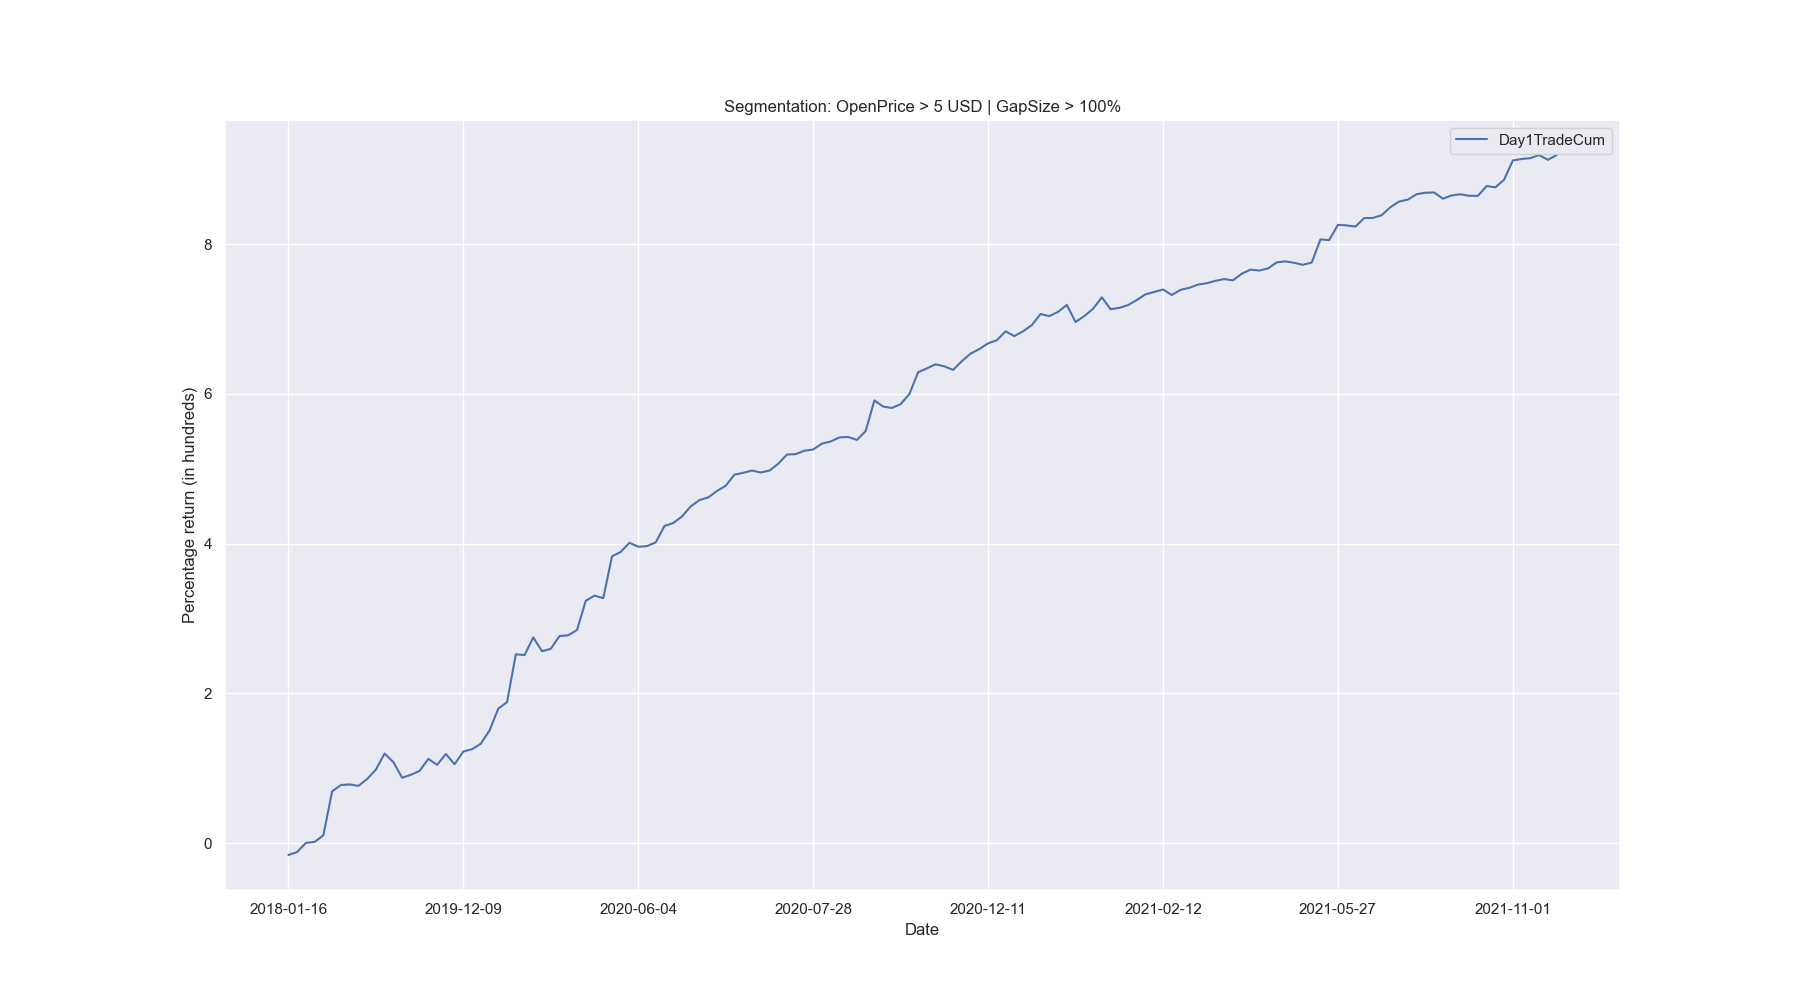

In [67]:
df_adjusted.plot(x="Date",y="Day1TradeCum",ylabel = 'Percentage return (in hundreds)', title="Segmentation: OpenPrice > 5 USD | GapSize > 100%")